In [1]:
import math
import numpy as np
import pandas as pd
import os
import glob
import pickle
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.metrics import mutual_info_score
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

In [2]:
def createcsv(dataframe, filename): #make sure to include .csv at the end of the filename
    dataframe.to_csv(filename,index=False)

In [3]:
def labels_interview (csv_file):
    df = pd.read_csv(csv_file)
    x_array = df.iloc[:,1:-6]
    y_array = df.iloc[:,230:]
    
    return x_array, y_array

In [4]:
def labels_openness (csv_file):
    df = pd.read_csv(csv_file)
    x_array = df.iloc[:,1:-6]
    y_array = df.iloc[:,225]
    return x_array, y_array

In [5]:
def labels_conscientiousness (csv_file):
    df = pd.read_csv(csv_file)
    x_array = df.iloc[:,1:-6]
    y_array = df.iloc[:,226]
    return x_array, y_array

In [6]:
def labels_extroversion (csv_file):
    df = pd.read_csv(csv_file)
    x_array = df.iloc[:,1:-6]
    y_array = df.iloc[:,227]
    return x_array, y_array

In [7]:
def labels_agreeableness (csv_file):
    df = pd.read_csv(csv_file)
    x_array = df.iloc[:,1:-6]
    y_array = df.iloc[:,228]
    return x_array, y_array

In [8]:
def labels_neuroticism (csv_file):
    df = pd.read_csv(csv_file)
    x_array = df.iloc[:,1:-6]
    y_array = df.iloc[:,229]
    return x_array, y_array

In [10]:
csv_file = "complete_CSV_Train.csv"
x_train, y_train = labels_interview(csv_file)
csv_file = "complete_CSV_validation.csv"
x_test, y_test = labels_interview(csv_file)

In [11]:
listbestvalues_interview = [130, 212, 178, 42, 74, 25, 8, 171, 184, 72, 31, 180, 172, 61, 73, 177, 223, 192, 125, 110, 142, 213, 181, 19, 100, 76, 27, 36, 163, 7, 187, 59, 126, 109, 111, 123, 41, 158, 115, 120, 71, 79, 11, 15, 208, 118, 102, 75, 112, 176, 195, 209, 121, 105, 222, 136, 220, 16, 124, 80, 108, 191, 30, 54, 185, 168, 210, 37, 52, 117, 201, 221, 205, 190, 81, 99, 60, 182, 38, 198, 131, 165, 207, 197, 33, 173, 83, 43, 29, 186, 32, 68, 66, 129, 216, 96, 103, 24, 206, 89, 174, 2, 166, 98, 22, 132, 65, 62, 3, 95, 157, 57, 6, 17, 67, 70, 69, 85, 107, 134, 23, 188, 116, 194, 13, 153, 82, 78, 56, 86, 156, 106, 119, 28, 55, 84, 128, 77, 179, 21, 164, 218, 170, 147, 211, 135, 154, 47, 150, 183, 141, 155, 138, 219, 160, 215, 26, 101, 104, 97, 93, 94, 203, 9, 151, 196, 58, 50, 167, 146, 87, 53, 4, 45, 35, 51, 127, 175, 159, 149, 10, 169, 193, 63, 162, 202, 92, 44, 204, 217, 214, 199, 200, 49, 5, 189, 48, 64, 46, 40, 39, 88, 90, 91, 34, 1, 113, 114, 122, 133, 137, 139, 140, 143, 144, 145, 148, 152, 20, 161, 18, 14, 12, 0]

In [12]:
listbestvalues_openness = [42, 36, 19, 37, 25, 51, 8, 48, 27, 6, 53, 61, 33, 41, 39, 130, 38, 198, 186, 71, 16, 101, 141, 223, 192, 21, 83, 106, 12, 92, 188, 150, 30, 189, 182, 120, 118, 68, 70, 17, 104, 3, 52, 11, 127, 179, 205, 108, 49, 176, 32, 187, 115, 199, 184, 58, 123, 133, 102, 0, 109, 103, 5, 107, 56, 135, 168, 197, 29, 116, 147, 105, 77, 117, 124, 85, 216, 119, 34, 169, 212, 132, 46, 173, 91, 202, 63, 137, 72, 64, 13, 9, 163, 185, 23, 162, 43, 181, 177, 121, 35, 180, 113, 90, 167, 40, 59, 151, 4, 213, 191, 154, 175, 131, 138, 222, 129, 142, 28, 18, 62, 60, 84, 20, 194, 125, 164, 155, 75, 7, 178, 143, 156, 31, 153, 171, 174, 15, 136, 14, 161, 140, 86, 10, 114, 112, 166, 217, 110, 128, 211, 93, 66, 159, 195, 201, 200, 55, 73, 74, 196, 221, 203, 126, 193, 1, 190, 76, 111, 69, 2, 204, 220, 206, 78, 207, 208, 209, 210, 57, 67, 214, 215, 65, 218, 219, 146, 79, 97, 44, 139, 50, 24, 160, 158, 157, 98, 144, 94, 145, 152, 95, 96, 149, 148, 165, 89, 88, 54, 183, 80, 81, 82, 45, 26, 22, 87, 134, 47, 100, 172, 99, 170, 122]

In [13]:
listbestvalues_conscientiousness = [150, 221, 82, 169, 57, 180, 173, 77, 129, 145, 36, 55, 93, 185, 88, 30, 204, 119, 209, 53, 167, 83, 87, 137, 29, 168, 179, 59, 203, 170, 66, 151, 115, 160, 177, 90, 108, 74, 136, 159, 68, 175, 118, 98, 158, 84, 222, 110, 117, 72, 128, 61, 178, 141, 60, 132, 8, 86, 50, 210, 78, 152, 155, 164, 149, 182, 156, 120, 154, 166, 218, 69, 200, 92, 219, 163, 109, 127, 201, 161, 97, 126, 206, 144, 153, 102, 212, 23, 162, 111, 99, 140, 125, 10, 100, 186, 114, 63, 143, 202, 95, 208, 105, 205, 184, 171, 89, 76, 73, 94, 148, 62, 124, 75, 5, 147, 133, 103, 181, 67, 1, 70, 12, 195, 54, 81, 142, 106, 96, 131, 116, 134, 107, 191, 174, 176, 85, 64, 165, 71, 123, 45, 130, 138, 26, 183, 157, 146, 19, 80, 192, 104, 211, 196, 139, 9, 27, 52, 56, 58, 32, 47, 198, 31, 112, 20, 18, 113, 187, 46, 193, 22, 2, 213, 51, 189, 79, 13, 188, 220, 16, 223, 38, 15, 214, 33, 91, 135, 11, 28, 14, 44, 199, 0, 3, 172, 49, 216, 194, 101, 48, 6, 40, 121, 41, 122, 4, 7, 217, 215, 65, 21, 17, 197, 24, 25, 207, 190, 34, 43, 37, 39, 42, 35]

In [14]:
listbestvalues_extroversion = [42, 25, 38, 8, 198, 41, 31, 46, 197, 191, 19, 6, 143, 2, 3, 125, 63, 202, 4, 20, 37, 200, 16, 192, 99, 100, 220, 194, 27, 32, 127, 51, 159, 109, 36, 112, 212, 172, 0, 130, 108, 175, 5, 56, 173, 74, 7, 30, 217, 105, 209, 23, 75, 188, 1, 134, 94, 67, 47, 111, 213, 184, 21, 107, 174, 208, 70, 15, 89, 48, 114, 44, 52, 196, 170, 133, 195, 113, 90, 142, 59, 149, 84, 215, 18, 165, 210, 160, 176, 123, 139, 40, 144, 91, 28, 141, 98, 155, 124, 140, 121, 145, 33, 190, 216, 116, 43, 150, 218, 10, 110, 88, 203, 169, 183, 34, 13, 29, 62, 164, 66, 49, 206, 132, 78, 151, 97, 119, 95, 128, 214, 76, 58, 177, 161, 199, 55, 69, 156, 83, 45, 148, 24, 65, 14, 87, 96, 166, 71, 11, 146, 135, 181, 179, 178, 180, 39, 182, 185, 186, 187, 189, 193, 201, 9, 204, 205, 207, 211, 219, 221, 222, 12, 131, 17, 77, 101, 26, 93, 92, 86, 85, 82, 81, 80, 79, 73, 171, 72, 68, 64, 61, 60, 57, 54, 53, 50, 35, 102, 103, 104, 106, 168, 167, 163, 162, 158, 157, 154, 153, 152, 147, 138, 137, 136, 129, 22, 126, 122, 120, 118, 117, 115, 223]

In [15]:
listbestvalues_agreeableness = [150, 186, 166, 163, 147, 8, 168, 164, 170, 141, 64, 145, 212, 47, 27, 122, 165, 108, 94, 162, 182, 207, 172, 54, 220, 144, 116, 205, 91, 55, 83, 167, 213, 41, 185, 159, 149, 181, 179, 133, 171, 148, 173, 67, 96, 31, 33, 151, 61, 180, 152, 84, 131, 124, 49, 28, 222, 80, 32, 93, 174, 104, 35, 126, 143, 42, 43, 161, 175, 183, 121, 204, 184, 221, 71, 92, 214, 58, 29, 119, 187, 98, 100, 140, 37, 87, 36, 52, 95, 153, 169, 63, 17, 110, 177, 88, 45, 23, 139, 59, 68, 103, 2, 97, 196, 73, 102, 62, 191, 105, 158, 190, 200, 137, 146, 127, 176, 89, 13, 154, 34, 77, 65, 132, 125, 115, 44, 223, 81, 99, 192, 85, 24, 202, 160, 53, 22, 155, 217, 56, 38, 210, 142, 156, 113, 50, 112, 106, 60, 66, 117, 118, 20, 21, 4, 130, 3, 19, 74, 70, 178, 90, 76, 12, 198, 30, 82, 25, 129, 72, 203, 208, 6, 75, 114, 128, 197, 78, 216, 199, 18, 5, 219, 218, 201, 16, 15, 14, 206, 215, 7, 209, 9, 10, 211, 11, 138, 39, 195, 194, 135, 134, 123, 120, 157, 1, 111, 109, 107, 101, 86, 79, 69, 57, 51, 48, 46, 40, 136, 26, 188, 189, 193, 0]

In [16]:
listbestvalues_neuroticism = [42, 8, 41, 36, 197, 25, 198, 132, 155, 16, 21, 192, 7, 212, 142, 218, 222, 6, 53, 30, 18, 144, 4, 133, 217, 19, 27, 214, 179, 55, 74, 143, 193, 185, 129, 203, 154, 23, 32, 200, 3, 147, 80, 189, 59, 49, 88, 186, 219, 76, 172, 151, 140, 148, 77, 209, 20, 92, 101, 130, 208, 54, 61, 82, 191, 171, 78, 9, 141, 45, 165, 81, 38, 205, 11, 187, 12, 87, 91, 176, 106, 207, 194, 95, 161, 206, 17, 195, 199, 46, 139, 196, 52, 28, 153, 105, 83, 168, 167, 184, 58, 156, 104, 47, 98, 158, 145, 97, 152, 138, 14, 163, 150, 146, 57, 96, 215, 136, 210, 34, 211, 64, 40, 108, 178, 86, 66, 166, 137, 202, 10, 123, 33, 79, 0, 110, 164, 67, 94, 174, 13, 221, 175, 126, 103, 182, 119, 99, 125, 102, 115, 69, 201, 31, 181, 180, 204, 213, 183, 190, 216, 170, 169, 220, 173, 188, 177, 112, 162, 160, 73, 72, 71, 70, 68, 65, 63, 62, 60, 56, 51, 50, 48, 44, 43, 39, 37, 35, 29, 26, 24, 22, 15, 5, 2, 75, 84, 85, 120, 159, 157, 149, 135, 134, 131, 128, 127, 124, 122, 121, 118, 89, 117, 116, 114, 113, 1, 111, 109, 107, 100, 93, 90, 223]

In [19]:
x_train_10 = bestfeatureslist(x_train, listbestvalues_interview, 10)
x_test_10 = bestfeatureslist(x_test, listbestvalues_interview, 10)

In [210]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_10, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.3414124153552239


In [20]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [22]:
dt.fit(x_train_10, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

In [23]:
Y_pred = dt.predict(x_test_10)

In [25]:
mae = mean_absolute_error(y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8890877487609727


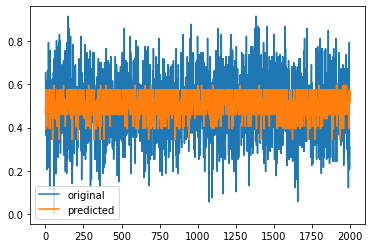

In [26]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label= 'original')
plt.plot(x_ax, Y_pred, label= 'predicted')
plt.legend()
plt.show()

In [260]:
x_train_20 = bestfeatureslist(x_train, listbestvalues_interview, 20)
x_test_20 = bestfeatureslist(x_test, listbestvalues_interview, 20)

In [261]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_20, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 6, 'min_samples_leaf': 0.01}
Lowest score:  0.34023790171343443


In [262]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=6,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [264]:
dt.fit(x_train_20, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.01, random_state=3)

In [266]:
Y_pred = dt.predict(x_test_20)

In [267]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8887142381055186


In [218]:
x_train_50 = bestfeatureslist(x_train, listbestvalues_interview, 50)
x_test_50 = bestfeatureslist(x_test, listbestvalues_interview, 50)

In [219]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_50, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1}
Lowest score:  0.3408188522307302


In [220]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 1,
                          random_state=3)

In [222]:
dt.fit(x_train_50, y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

In [224]:
Y_pred = dt.predict(x_test_50)

In [225]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8885367851265525


In [226]:
x_train_100 = bestfeatureslist(x_train, listbestvalues_interview, 100)
x_test_100 = bestfeatureslist(x_test, listbestvalues_interview, 100)

In [241]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_100, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1}
Lowest score:  0.34107832272060695


In [228]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 1,
                          random_state=3)

In [229]:
dt.fit(x_train_100, y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

In [230]:
Y_pred = dt.predict(x_test_100)

In [231]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8876965336618408


In [234]:
x_train_224 = bestfeatureslist(x_train, listbestvalues_interview, 224)
x_test_224 = bestfeatureslist(x_test, listbestvalues_interview, 224)

In [235]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_224, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1}
Lowest score:  0.34107832272060695


In [236]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 1,
                          random_state=3)

In [237]:
dt.fit(x_train_224, y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

In [238]:
Y_pred = dt.predict(x_test_224)

In [239]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8882734101998978


In [27]:
csv_file = "complete_CSV_Train.csv"
x_train, y_train = labels_openness(csv_file)
csv_file = "complete_CSV_validation.csv"
x_test, y_test = labels_openness(csv_file)

In [28]:
x_train_10 = bestfeatureslist(x_train, listbestvalues_openness, 10)
x_test_10 = bestfeatureslist(x_test, listbestvalues_openness, 10)

In [254]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_10, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 3, 'min_samples_leaf': 1}
Lowest score:  0.33492788759419356


In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=3,
                          min_samples_leaf = 1,
                          random_state=3)

In [30]:
dt.fit(x_train_10, y_train)

DecisionTreeRegressor(max_depth=3, random_state=3)

In [31]:
Y_pred = dt.predict(x_test_10)

In [33]:
mae = mean_absolute_error(y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.891822752580405


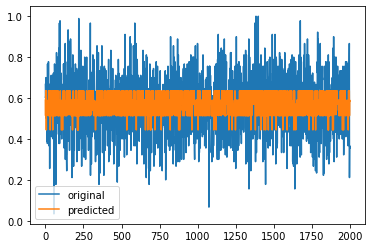

In [34]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label= 'original')
plt.plot(x_ax, Y_pred, label= 'predicted')
plt.legend()
plt.show()

In [269]:
x_train_50 = bestfeatureslist(x_train, listbestvalues_openness, 50)
x_test_50 = bestfeatureslist(x_test, listbestvalues_openness, 50)

In [270]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_50, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 0.01}
Lowest score:  0.33296604391065954


In [271]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=5,
                          min_samples_leaf = 1,
                          random_state=3)

In [277]:
dt.fit(x_train_50, y_train)

DecisionTreeRegressor(max_depth=5, random_state=3)

In [278]:
Y_pred = dt.predict(x_test_50)

In [279]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8762624345305351


In [275]:
x_train_100 = bestfeatureslist(x_train, listbestvalues_openness, 100)
x_test_100 = bestfeatureslist(x_test, listbestvalues_openness, 100)

In [276]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_100, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 6, 'min_samples_leaf': 0.01}
Lowest score:  0.3334343455440495


In [280]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=6,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [281]:
dt.fit(x_train_100, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.01, random_state=3)

In [282]:
Y_pred = dt.predict(x_test_100)

In [283]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8772759979190977


In [290]:
x_train_224 = bestfeatureslist(x_train, listbestvalues_openness, 224)
x_test_224 = bestfeatureslist(x_test, listbestvalues_openness, 224)

In [291]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_224, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 0.01}
Lowest score:  0.3325363652557089


In [294]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=5,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [295]:
dt.fit(x_train_224, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.01, random_state=3)

In [296]:
Y_pred = dt.predict(x_test_224)

In [297]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8770253870277304


In [35]:
csv_file = "complete_CSV_Train.csv"
x_train, y_train = labels_conscientiousness(csv_file)
csv_file = "complete_CSV_validation.csv"
x_test, y_test = labels_conscientiousness(csv_file)

In [299]:
x_train_10 = bestfeatureslist(x_train, listbestvalues_conscientiousness, 10)
x_test_10 = bestfeatureslist(x_test, listbestvalues_conscientiousness, 10)

In [300]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_10, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.3502785168290907


In [301]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [302]:
dt.fit(x_train_10, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

In [303]:
Y_pred = dt.predict(x_test_10)

In [304]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8853546544984787


In [305]:
x_train_50 = bestfeatureslist(x_train, listbestvalues_conscientiousness, 50)
x_test_50 = bestfeatureslist(x_test, listbestvalues_conscientiousness, 50)

In [306]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_50, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 0.01}
Lowest score:  0.34876024543891376


In [307]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=5,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [308]:
dt.fit(x_train_50, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.01, random_state=3)

In [309]:
Y_pred = dt.predict(x_test_50)

In [310]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8847445042753344


In [311]:
x_train_100 = bestfeatureslist(x_train, listbestvalues_conscientiousness, 100)
x_test_100 = bestfeatureslist(x_test, listbestvalues_conscientiousness, 100)

In [312]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_100, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1}
Lowest score:  0.3484549735325411


In [315]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 1,
                          random_state=3)

In [316]:
dt.fit(x_train_100, y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

In [317]:
Y_pred = dt.predict(x_test_100)

In [318]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8861007146153306


In [36]:
x_train_224 = bestfeatureslist(x_train, listbestvalues_conscientiousness, 224)
x_test_224 = bestfeatureslist(x_test, listbestvalues_conscientiousness, 224)

In [320]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_224, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.3478370138548622


In [37]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [38]:
dt.fit(x_train_224, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

In [39]:
Y_pred = dt.predict(x_test_224)

In [41]:
mae = mean_absolute_error(y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8790004677318606


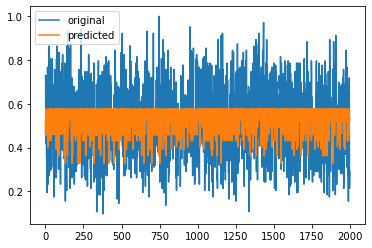

In [42]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label= 'original')
plt.plot(x_ax, Y_pred, label= 'predicted')
plt.legend()
plt.show()

In [43]:
csv_file = "complete_CSV_Train.csv"
x_train, y_train = labels_extroversion(csv_file)
csv_file = "complete_CSV_validation.csv"
x_test, y_test = labels_extroversion(csv_file)

In [326]:
x_train_10 = bestfeatureslist(x_train, listbestvalues_extroversion, 10)
x_test_10 = bestfeatureslist(x_test, listbestvalues_extroversion, 10)

In [327]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_10, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.33298806239631273


In [328]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [329]:
dt.fit(x_train_10, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

In [330]:
Y_pred = dt.predict(x_test_10)

In [331]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8832887019157342


In [332]:
x_train_50 = bestfeatureslist(x_train, listbestvalues_conscientiousness, 50)
x_test_50 = bestfeatureslist(x_test, listbestvalues_conscientiousness, 50)

In [333]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_50, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.34505270143785954


In [334]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [335]:
dt.fit(x_train_50, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

In [336]:
Y_pred = dt.predict(x_test_50)

In [337]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8837639227780332


In [44]:
x_train_100 = bestfeatureslist(x_train, listbestvalues_conscientiousness, 100)
x_test_100 = bestfeatureslist(x_test, listbestvalues_conscientiousness, 100)

In [339]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_100, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 3, 'min_samples_leaf': 0.01}
Lowest score:  0.33707570916947965


In [45]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=3,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [46]:
dt.fit(x_train_100, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.01, random_state=3)

In [47]:
Y_pred = dt.predict(x_test_100)

In [48]:
mae = mean_absolute_error(y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8907055260068697


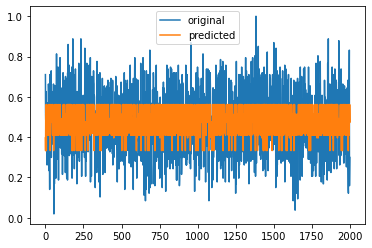

In [49]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label= 'original')
plt.plot(x_ax, Y_pred, label= 'predicted')
plt.legend()
plt.show()

In [344]:
x_train_224 = bestfeatureslist(x_train, listbestvalues_conscientiousness, 224)
x_test_224 = bestfeatureslist(x_test, listbestvalues_conscientiousness, 224)

In [345]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_224, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 0.01}
Lowest score:  0.3318535911340461


In [346]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=5,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [347]:
dt.fit(x_train_224, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.01, random_state=3)

In [348]:
Y_pred = dt.predict(x_test_224)

In [349]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8837679887058789


In [50]:
csv_file = "complete_CSV_Train.csv"
x_train, y_train = labels_agreeableness(csv_file)
csv_file = "complete_CSV_validation.csv"
x_test, y_test = labels_agreeableness(csv_file)

In [352]:
x_train_10 = bestfeatureslist(x_train, listbestvalues_agreeableness, 10)
x_test_10 = bestfeatureslist(x_test, listbestvalues_agreeableness, 10)

In [353]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_10, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.32618840924725234


In [354]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [366]:
dt.fit(x_train_10, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.01, random_state=3)

In [367]:
Y_pred = dt.predict(x_test_10)

In [368]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8835091590984064


In [358]:
x_train_50 = bestfeatureslist(x_train, listbestvalues_agreeableness, 50)
x_test_50 = bestfeatureslist(x_test, listbestvalues_agreeableness, 50)

In [359]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_50, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 3, 'min_samples_leaf': 0.01}
Lowest score:  0.3258941191882124


In [360]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=3,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [361]:
dt.fit(x_train_50, y_train)

DecisionTreeRegressor(max_depth=3, min_samples_leaf=0.01, random_state=3)

In [362]:
Y_pred = dt.predict(x_test_50)

In [363]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8832329136765776


In [51]:
x_train_100 = bestfeatureslist(x_train, listbestvalues_agreeableness, 100)
x_test_100 = bestfeatureslist(x_test, listbestvalues_agreeableness, 100)

In [365]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_100, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.32542323672604817


In [52]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [53]:
dt.fit(x_train_100, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

In [55]:
Y_pred = dt.predict(x_test_100)

In [57]:
mae = mean_absolute_error(y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.9007460962411956


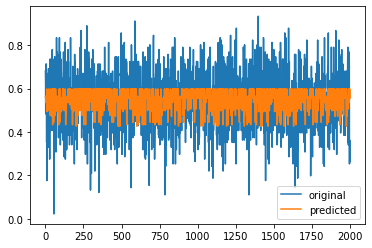

In [58]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label= 'original')
plt.plot(x_ax, Y_pred, label= 'predicted')
plt.legend()
plt.show()

In [369]:
x_train_224 = bestfeatureslist(x_train, listbestvalues_agreeableness, 224)
x_test_224 = bestfeatureslist(x_test, listbestvalues_agreeableness, 224)

In [370]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_224, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 0.1}
Lowest score:  0.3257159764457204


In [371]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=5,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [372]:
dt.fit(x_train_224, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.01, random_state=3)

In [373]:
Y_pred = dt.predict(x_test_224)

In [374]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8834263836453933


In [59]:
csv_file = "complete_CSV_Train.csv"
x_train, y_train = labels_neuroticism(csv_file)
csv_file = "complete_CSV_validation.csv"
x_test, y_test = labels_neuroticism(csv_file)

In [377]:
x_train_10 = bestfeatureslist(x_train, listbestvalues_neuroticism, 10)
x_test_10 = bestfeatureslist(x_test, listbestvalues_neuroticism, 10)

In [378]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_10, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 0.01}
Lowest score:  0.3430921420157639


In [379]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [380]:
dt.fit(x_train_10, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.01, random_state=3)

In [381]:
Y_pred = dt.predict(x_test_10)

In [382]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8868573774550677


In [383]:
x_train_50 = bestfeatureslist(x_train, listbestvalues_neuroticism, 50)
x_test_50 = bestfeatureslist(x_test, listbestvalues_neuroticism, 50)

In [384]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_50, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 5, 'min_samples_leaf': 0.01}
Lowest score:  0.3428547709511748


In [385]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=5,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [387]:
dt.fit(x_train_50, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=0.01, random_state=3)

In [388]:
Y_pred = dt.predict(x_test_50)

In [389]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8882965903622089


In [390]:
x_train_100 = bestfeatureslist(x_train, listbestvalues_neuroticism, 100)
x_test_100 = bestfeatureslist(x_test, listbestvalues_neuroticism, 100)

In [391]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_100, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 6, 'min_samples_leaf': 0.01}
Lowest score:  0.3427925658525875


In [392]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=6,
                          min_samples_leaf = 0.01,
                          random_state=3)

In [393]:
dt.fit(x_train_100, y_train)

DecisionTreeRegressor(max_depth=6, min_samples_leaf=0.01, random_state=3)

In [394]:
Y_pred = dt.predict(x_test_100)

In [395]:
mae = mean_absolute_error(Y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.887695219415155


In [60]:
x_train_224 = bestfeatureslist(x_train, listbestvalues_neuroticism, 224)
x_test_224 = bestfeatureslist(x_test, listbestvalues_neuroticism, 224)

In [397]:
import pandas as pd
from sklearn.model_selection import GridSearchCV

data = pd.read_csv("complete_CSV_Train.csv")

X, y = x_train_224, y_train #1
    
params = { 'max_depth': [1,2,3,4,5,6, None],
         'min_samples_leaf': [0.1, 0.5, 0.01, 1],
         }

dt = dt
clf = GridSearchCV(estimator=dt, 
                   param_grid=params,
                   scoring='neg_mean_absolute_error', 
                   verbose=1)

clf.fit(X, y)
print("Best parameters:", clf.best_params_)
print("Lowest score: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best parameters: {'max_depth': 4, 'min_samples_leaf': 1}
Lowest score:  0.34288052577038014


In [61]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE


dt = DecisionTreeRegressor(max_depth=4,
                          min_samples_leaf = 1,
                          random_state=3)

In [62]:
dt.fit(x_train_224, y_train)

DecisionTreeRegressor(max_depth=4, random_state=3)

In [63]:
Y_pred = dt.predict(x_test_224)

In [65]:
mae = mean_absolute_error(y_test, Y_pred)

print("1-MAE", 1-mae)

1-MAE 0.8871953131538554


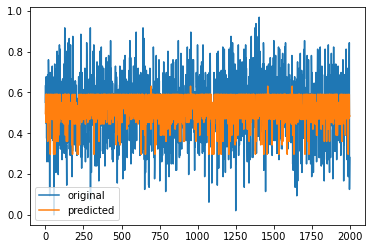

In [66]:
import matplotlib.pyplot as plt

x_ax = range(len(y_test))
plt.plot(x_ax, y_test, label= 'original')
plt.plot(x_ax, Y_pred, label= 'predicted')
plt.legend()
plt.show()